In [ ]:
import numpy as np

def F1(t):
  return 0.063*(t**3) -5.284*(t**2) + 4.887*t + 412 + np.random.normal(0,1)

# 產生1000個不同的sample(10000) 假設數字不知 去回推
N = 10000
A = np.zeros((N, 4)) # t**3
A = np.zeros((N, 5)) # t**4 如果以為有四次方
b = np.zeros((N, 1))

for n in range(N):
  t = np.random.random()*100 #0-100
  b[n] = F1(t)
  A[n,0] = 1
  A[n,1] = t
  A[n,2] = t **2
  A[n,3] = t **3
  A[n,4] = t **4 # 如果以為有四次方
x = np.linalg.lstsq(A,b)[0]
print(x)



[[ 4.12053155e+02]
 [ 4.88743838e+00]
 [-5.28414788e+00]
 [ 6.30030891e-02]
 [-1.79638535e-08]]


In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys(): #上傳檔案
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving images.jpg to images.jpg
User uploaded file "images.jpg" with length 5650 bytes


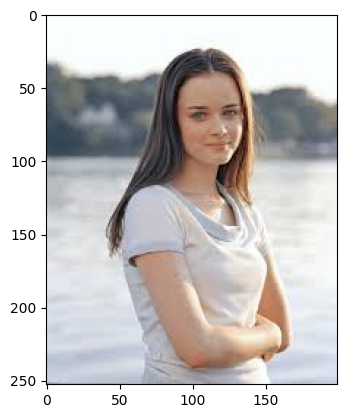

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

BG = Image.open('BG.jpg')
FG = Image.open('FG.jpg')
plt.imshow(BG)
plt.imshow(FG)

In [ ]:
1920*1080*3*30*60*60/1024/1024/1024

625.7057189941406

In [ ]:
# @title
BG_data = np.asarray(BG).copy()
FG_data = np.asarray(FG).copy()
[HB,WB,t] = BG_data.shape
[HF,WF,t] = FG_data.shape
# 畫框左上角座標位置
x1 = 490
y1 = 148
p1 = 0
q1 = 0
# 畫框右上角座標位置
x2 = 535
y2 = 141
p2 = WF-1
q2 = 0
x3 = 488
y3 = 294
p3 = 0
q3 = HF-1
x4 = 536
y4 = 302
p4 = WF-1
q4 = HF-1
A = np.zeros((8,8))
b = np.zeros((8,1))
A[0,:] = [-x1,-y1,-1,0,0,0,x1*p1,y1*p1]
b[0,0] = -p1
A[1,:] = [0,0,0,-x1,-y1,-1,x1*q1,y1*q1]
b[1,0] = -q1





# 開始跑照片裡的值去取代
x = np.linalg.lstsq(a,b)[0]
H = np.zeros((3,3))
H[0,0] = x[0]
H[0,1] = x[1]
H[0,2] = x[2]
H[1,0] = x[3]
H[1,1] = x[4]
H[1,2] = x[5]
H[2,0] = x[6]
H[2,1] = x[7]
H[2,2] = 1
xy1 = np.ones((3,1))
pq1 = np.ones((3,1))
for h in range(HB):
  for w in range(WB):
    xy1[0] = w
    xy1[1] = h
    pq1 = np.dot(H,xy1)
    p = int(pq1[0]/pq1[2])
    q = int(pq1[1]/pq1[2])
    if p>=0 and p<WF and q>=0 and q<HF:
      BG_data[h,w,:] = FG_data[q,p,:]
I = Image.fromarray(BG_data)
plt.imshow(I)

/tmp/ipython-input-64085909.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p = int(pq1[0] / pq1[2])
/tmp/ipython-input-64085909.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q = int(pq1[1] / pq1[2])


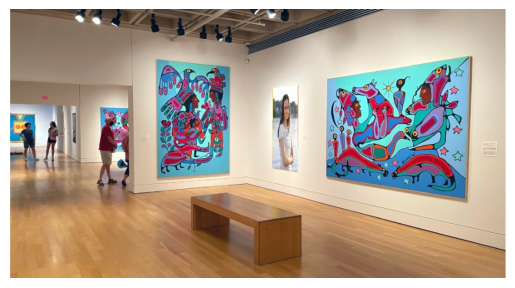

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

BG_data = np.asarray(BG).copy()
FG_data = np.asarray(FG).copy()
HB, WB, t = BG_data.shape
HF, WF, t = FG_data.shape

# --- Corresponding points ---
# Background coordinates (x, y)
x1, y1 = 490, 148
x2, y2 = 535, 141
x3, y3 = 488, 294
x4, y4 = 536, 302

# Foreground coordinates (p, q)
p1, q1 = 0, 0
p2, q2 = WF - 1, 0
p3, q3 = 0, HF - 1
p4, q4 = WF - 1, HF - 1

# --- Build A and b ---
A = np.zeros((8, 8))
b = np.zeros((8, 1))

pts = [
    (x1, y1, p1, q1),
    (x2, y2, p2, q2),
    (x3, y3, p3, q3),
    (x4, y4, p4, q4)
]

for i, (x, y, p, q) in enumerate(pts):
    A[2*i, :]   = [-x, -y, -1, 0, 0, 0, x*p, y*p]
    A[2*i+1, :] = [0, 0, 0, -x, -y, -1, x*q, y*q]
    b[2*i, 0]   = -p
    b[2*i+1, 0] = -q

# --- Solve for homography parameters ---
x = np.linalg.lstsq(A, b, rcond=None)[0]

# --- Build H matrix ---
H = np.array([
    [x[0,0], x[1,0], x[2,0]],
    [x[3,0], x[4,0], x[5,0]],
    [x[6,0], x[7,0], 1]
])

# --- Warp the foreground onto the background ---
xy1 = np.ones((3,1))

for h in range(HB):
    for w in range(WB):
        xy1[0] = w
        xy1[1] = h
        pq1 = np.dot(H, xy1)
        p = int(pq1[0] / pq1[2])
        q = int(pq1[1] / pq1[2])
        if 0 <= p < WF and 0 <= q < HF:
            BG_data[h, w, :] = FG_data[q, p, :]

I = Image.fromarray(BG_data.astype(np.uint8))
plt.imshow(I)
plt.axis('off')
plt.show()


/tmp/ipython-input-2951881258.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  H[0,0] = x[0]
/tmp/ipython-input-2951881258.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  H[0,1] = x[1]
/tmp/ipython-input-2951881258.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  H[0,2] = x[2]
/tmp/ipython-input-2951881258.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single ele

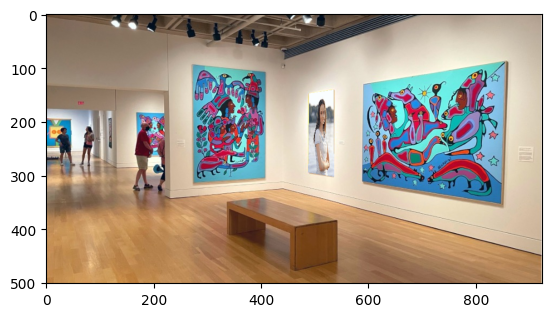

In [ ]:
BG_data = np.asarray(BG).copy()
FG_data = np.asarray(FG).copy()
[HB,WB,t] = BG_data.shape
[HF,WF,t] = FG_data.shape

# 畫框左上角座標位置
x1 = 490
y1 = 148
p1 = 0
q1 = 0
# 畫框右上角座標位置
x2 = 535
y2 = 141
p2 = WF-1
q2 = 0
# 畫框左下角座標位置
x3 = 488
y3 = 294
p3 = 0
q3 = HF-1
# 畫框右下角座標位置
x4 = 536
y4 = 302
p4 = WF-1
q4 = HF-1

A = np.zeros((8,8))
b = np.zeros((8,1))

A[0,:] = [-x1,-y1,-1,0,0,0,x1*p1,y1*p1]
b[0,0] = -p1
A[1,:] = [0,0,0,-x1,-y1,-1,x1*q1,y1*q1]
b[1,0] = -q1

A[2,:] = [-x2,-y2,-1,0,0,0,x2*p2,y2*p2]
b[2,0] = -p2
A[3,:] = [0,0,0,-x2,-y2,-1,x2*q2,y2*q2]
b[3,0] = -q2

A[4,:] = [-x3,-y3,-1,0,0,0,x3*p3,y3*p3]
b[4,0] = -p3
A[5,:] = [0,0,0,-x3,-y3,-1,x3*q3,y3*q3]
b[5,0] = -q3

A[6,:] = [-x4,-y4,-1,0,0,0,x4*p4,y4*p4]
b[6,0] = -p4
A[7,:] = [0,0,0,-x4,-y4,-1,x4*q4,y4*q4]
b[7,0] = -q4

# 開始跑照片裡的值去取代
x = np.linalg.lstsq(A,b,rcond=None)[0]
H = np.zeros((3,3))
H[0,0] = x[0]
H[0,1] = x[1]
H[0,2] = x[2]
H[1,0] = x[3]
H[1,1] = x[4]
H[1,2] = x[5]
H[2,0] = x[6]
H[2,1] = x[7]
H[2,2] = 1

xy1 = np.ones((3,1))
pq1 = np.ones((3,1))
for h in range(HB):
  for w in range(WB):
    xy1[0] = w
    xy1[1] = h
    pq1 = np.dot(H,xy1)
    p = int(pq1[0]/pq1[2])
    q = int(pq1[1]/pq1[2])
    if p>=0 and p<WF and q>=0 and q<HF:
      BG_data[h,w,:] = FG_data[q,p,:]

I = Image.fromarray(BG_data.astype(np.uint8))
plt.imshow(I)
